In [120]:
import matplotlib.pyplot as plt

In [121]:
import pandas as pd

In [122]:
import numpy as np

In [123]:
#データを10件取得する
train_file = pd.read_csv('./train.csv', nrows=10)
train_file

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1
5,6,29,blue-collar,single,secondary,no,260,yes,no,unknown,2,jun,707,14,-1,0,unknown,1
6,7,37,services,married,secondary,no,52,yes,no,cellular,6,sep,908,1,185,9,success,1
7,8,32,technician,single,secondary,no,230,yes,no,cellular,18,may,442,1,266,8,failure,1
8,9,31,admin.,single,secondary,no,0,yes,no,cellular,7,may,895,2,295,2,failure,1
9,10,32,self-employed,single,tertiary,no,1815,no,no,telephone,10,aug,235,1,102,2,failure,1


In [124]:
#各種統計量を取得する
train_file.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000,10.0
mean,5.50000,38.100000,682.000000,13.200000,579.000000,3.3000,144.800000,2.500000,1.0
std,3.02765,10.805863,704.908347,9.413938,276.333936,4.6916,196.313129,3.308239,0.0
min,1.00000,29.000000,0.000000,2.000000,172.000000,1.0000,-1.000000,0.000000,1.0
25%,3.25000,31.250000,237.500000,6.250000,427.750000,1.0000,-1.000000,0.000000,1.0
50%,5.50000,34.000000,395.000000,11.500000,534.500000,1.0000,55.500000,2.000000,1.0
75%,7.75000,38.500000,1200.750000,18.000000,848.000000,1.7500,245.750000,2.000000,1.0
max,10.00000,63.000000,1815.000000,30.000000,939.000000,14.0000,595.000000,9.000000,1.0


In [125]:
#データ型を出力する
train_file.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

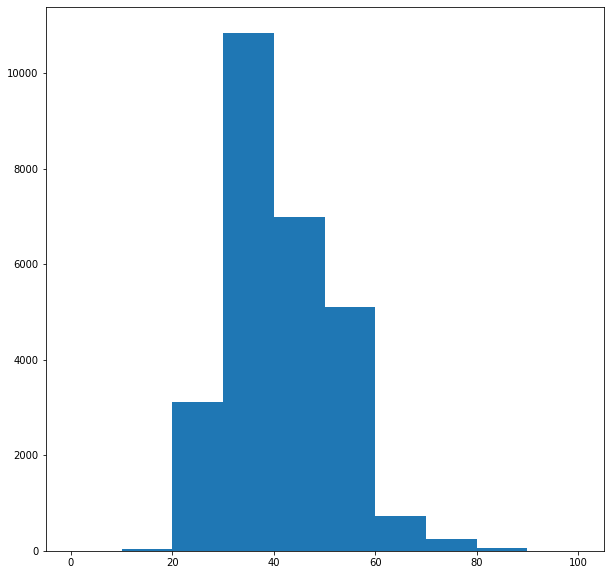

In [126]:
#全件取得
train_file_all = pd.read_csv('./train.csv')

#ヒストグラム出力
plt.hist(train_file_all['age'].dropna(), bins = 10, range = (0, 100))
plt.show()

In [127]:
#単変数の集計(質的変数)
#jobの集計
train_file_all['job'].value_counts()

blue-collar      5886
management       5620
technician       4491
admin.           3085
services         2506
retired          1391
self-employed     945
entrepreneur      914
unemployed        790
housemaid         765
student           557
unknown           178
Name: job, dtype: int64

In [128]:
#目的変数とのクロス集計(質的変数)
#jobとyの集計
pd.crosstab(train_file_all['job'], train_file_all['y'])

y,0,1
job,,
admin.,2700,385
blue-collar,5456,430
entrepreneur,834,80
housemaid,697,68
management,4853,767
retired,1080,311
self-employed,828,117
services,2282,224
student,391,166


In [129]:
# 年代のカラムをつくる
train_file_all['age_c'] = pd.cut(train_file_all['age'], bins=[0, 20, 30, 40, 50, 60, 100])

#ageとyの集計
pd.crosstab(train_file_all['age_c'], train_file_all['y'])

y,0,1
age_c,,
"(0, 20]",39,21
"(20, 30]",3486,655
"(30, 40]",9488,1111
"(40, 50]",6117,602
"(50, 60]",4416,488
"(60, 100]",408,297


<BarContainer object of 3 artists>

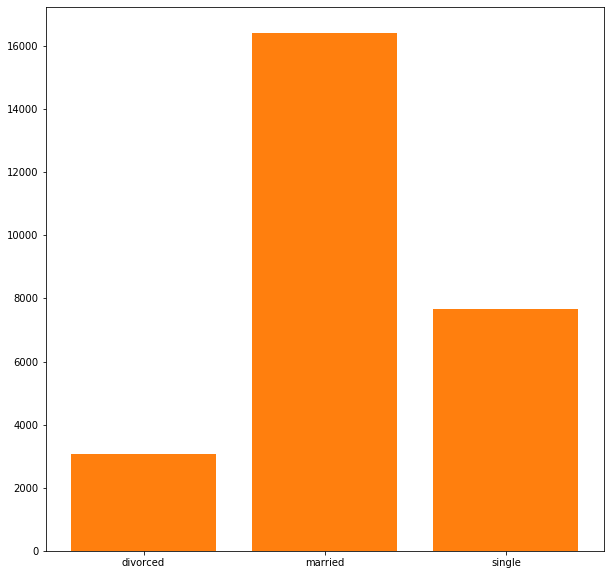

In [130]:
#maritalの分布を可視化する

train_file_tmp = train_file_all['marital'].value_counts()

left = np.array(["divorced", "married", "single"])
height = np.array([train_file_tmp['divorced'], train_file_tmp['married'], train_file_tmp['single']])
plt.bar(left, height)

label = ["divorced", "married", "single"]
plt.bar(left, height, tick_label=label, align="center")